# Quantitative Analyses

Kendra Wyant  
September 3, 2024

Purpose: This file is the primary analysis script for the self-report acceptability data (`burden_quant.csv`).

## Set up

In [ ]:

options(conflicts.policy = "depends.ok")
library(tidyverse) 


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Attaching package: 'janitor'

The following objects are masked from 'package:stats':

    chisq.test, fisher.test

ℹ SHA-1 hash of file is "a58e57da996d1b70bb9a5b58241325d6fd78890f"

### Data

In [ ]:
dem <- read_csv(here::here(path_burden, "demographics.csv"),
                show_col_types = FALSE) 


In [ ]:
burden <- read_csv(here::here(path_burden, "burden_quant.csv"),
                   show_col_types = FALSE) |> 
  mutate(daily_update_interfere = factor(daily_update_interfere, 
                                         levels = c("Strongly agree", "Mildly agree", 
                                          "Agree and disagree equally", "Mildly disagree", 
                                          "Strongly disagree")),
         daily_update_interfere = factor(daily_update_interfere, 
                                         levels = c("Strongly agree", "Mildly agree", 
                                          "Agree and disagree equally", "Mildly disagree", 
                                          "Strongly disagree")),
         monthly_update_interfere = factor(monthly_update_interfere, 
                                         levels = c("Strongly agree", "Mildly agree", 
                                          "Agree and disagree equally", "Mildly disagree", 
                                          "Strongly disagree")),
         daily_update_dislike = factor(daily_update_dislike, 
                                         levels = c("Strongly agree", "Mildly agree", 
                                          "Agree and disagree equally", "Mildly disagree", 
                                          "Strongly disagree")),
         monthly_update_dislike = factor(monthly_update_dislike, 
                                         levels = c("Strongly agree", "Mildly agree", 
                                          "Agree and disagree equally", "Mildly disagree", 
                                          "Strongly disagree")),
         gps_dislike = factor(gps_dislike, 
                                         levels = c("Strongly agree", "Mildly agree", 
                                          "Agree and disagree equally", "Mildly disagree", 
                                          "Strongly disagree")),
         sms_phone_logs_dislike = factor(sms_phone_logs_dislike, 
                                         levels = c("Strongly agree", "Mildly agree", 
                                          "Agree and disagree equally", "Mildly disagree", 
                                          "Strongly disagree")),
         sms_content_dislike = factor(sms_content_dislike, 
                                         levels = c("Strongly agree", "Mildly agree", 
                                          "Agree and disagree equally", "Mildly disagree", 
                                          "Strongly disagree"))) |> 
  glimpse()


Rows: 247
Columns: 12
$ subid                    <dbl> 1006, 1009, 1010, 1012, 1014, 1017, 1020, 102…
$ study_start              <dttm> 2021-04-24 20:41:22, 2021-05-05 02:23:12, 20…
$ user_survey_guid         <chr> "7720de45-c927-48fe-96c0-a1ec579d4462", "6561…
$ start_date               <dttm> 2021-06-26 04:27:28, 2021-07-15 01:14:24, 20…
$ complete_date            <dttm> 2021-06-26 10:02:12, 2021-07-15 01:39:22, 20…
$ daily_update_interfere   <fct> Strongly disagree, Strongly disagree, Mildly …
$ daily_update_dislike     <fct> Strongly disagree, Strongly disagree, Mildly …
$ monthly_update_interfere <fct> Strongly disagree, Mildly disagree, Strongly …
$ monthly_update_dislike   <fct> Strongly disagree, Mildly disagree, Mildly ag…
$ gps_dislike              <fct> Strongly disagree, Mildly disagree, Mildly di…
$ sms_phone_logs_dislike   <fct> Strongly disagree, Mildly disagree, Mildly di…
$ sms_content_dislike      <fct> Strongly disagree, Mildly disagree, Mildly di…

### Interference

In [ ]:
interference_plot_data <- burden |> 
  select(contains("interfere")) |>   
  pivot_longer(everything(), names_to = "measure", values_drop_na = TRUE) |> 
  mutate(measure = factor(measure, 
                          levels = c("daily_update_interfere", "monthly_update_interfere"),
                          labels = c("Daily update", "Monthly update"))) |> 
  mutate(value = factor(value, levels = c("Strongly agree", "Mildly agree", 
                                          "Agree and disagree equally", "Mildly disagree", 
                                          "Strongly disagree"))) 


plot_int <- interference_plot_data |> 
  ggplot(aes(x = value, y = after_stat(prop), group = measure)) +
  geom_bar(color = "black", fill = "light grey") +
  facet_grid(~ measure) +
  theme_classic() +
  labs(y = "Proportion",
       x = NULL,
       title = "Completing the update interfered with my daily activities") +
  theme(legend.position = "none",
        text = element_text(size = 12),
        axis.text.x = element_text(angle = 45, hjust = 1)) +
  ylim(0, .7) +
  geom_vline(aes(xintercept = "Agree and disagree equally"), linetype = "dashed", linewidth = .4, color = "#787575") +
  geom_vline(aes(xintercept = means), interference_plot_data |> 
  group_by(measure) |> 
  summarise(means = mean(as.numeric(value), na.rm = TRUE)), linewidth = .705, color = "black") 


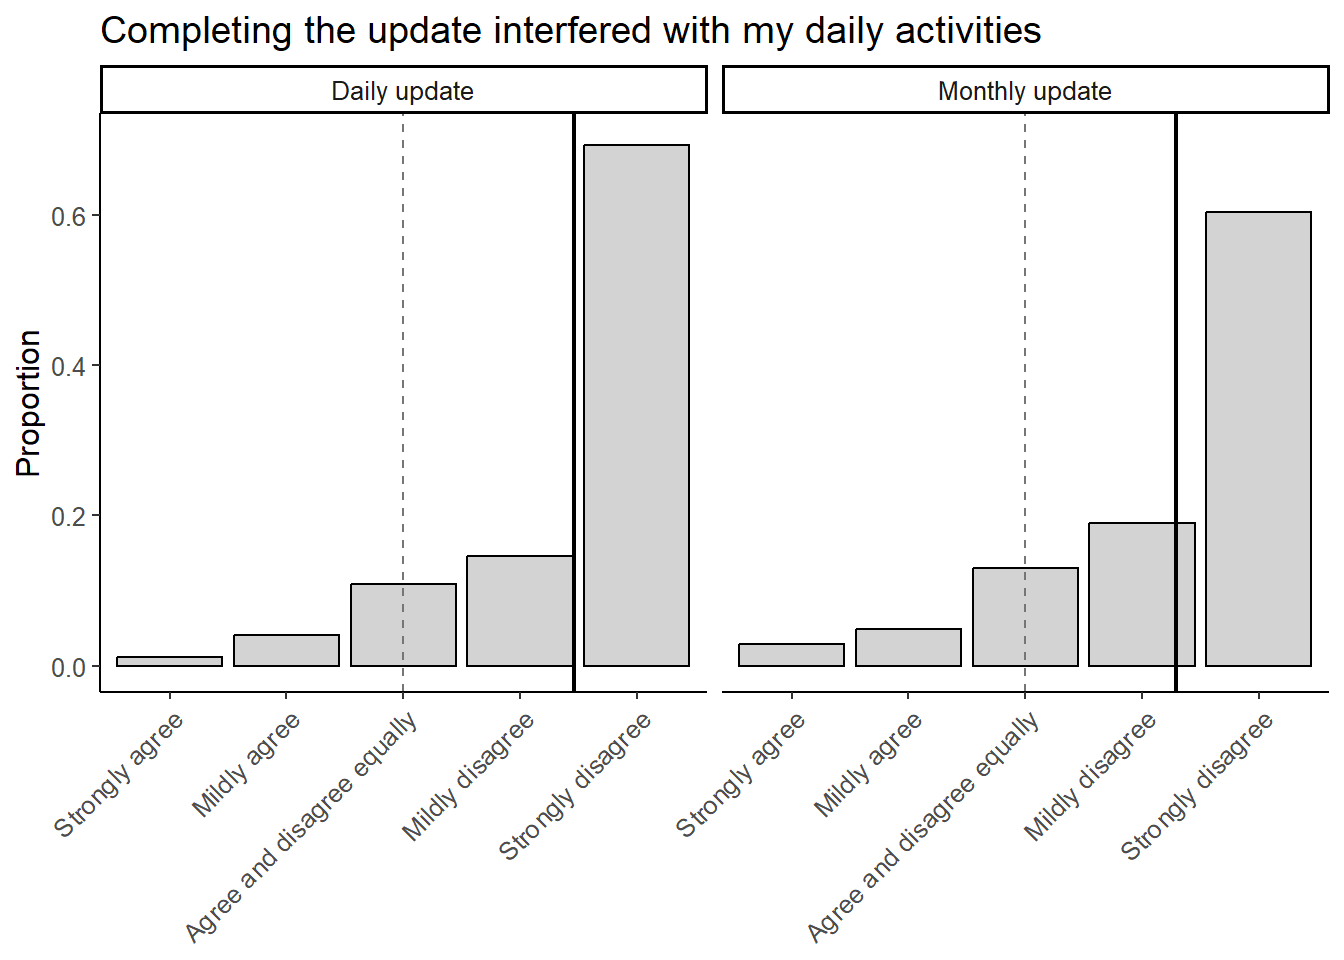

In [ ]:

plot_int


#### Correlation and Summary Statistics

Run one sample t-tests to compare each raw data stream mean (for self-reported acceptability about interference) to a neutral score of 0.

In [ ]:
burden_ana <- burden |> 
  mutate(daily_update_interfere = case_match(daily_update_interfere, 
                                             "Strongly agree" ~ -2, 
                                             "Mildly agree" ~ -1, 
                                             "Agree and disagree equally" ~ 0, 
                                             "Mildly disagree" ~ 1, 
                                             "Strongly disagree" ~ 2),
         monthly_update_interfere = case_match(monthly_update_interfere, 
                                             "Strongly agree" ~ -2, 
                                             "Mildly agree" ~ -1, 
                                             "Agree and disagree equally" ~ 0, 
                                             "Mildly disagree" ~ 1, 
                                             "Strongly disagree" ~ 2),
         daily_update_dislike = case_match(daily_update_dislike, 
                                             "Strongly agree" ~ -2, 
                                             "Mildly agree" ~ -1, 
                                             "Agree and disagree equally" ~ 0, 
                                             "Mildly disagree" ~ 1, 
                                             "Strongly disagree" ~ 2),
         monthly_update_dislike = case_match(monthly_update_dislike, 
                                             "Strongly agree" ~ -2, 
                                             "Mildly agree" ~ -1, 
                                             "Agree and disagree equally" ~ 0, 
                                             "Mildly disagree" ~ 1, 
                                             "Strongly disagree" ~ 2),
         gps_dislike = case_match(gps_dislike, 
                                             "Strongly agree" ~ -2, 
                                             "Mildly agree" ~ -1, 
                                             "Agree and disagree equally" ~ 0, 
                                             "Mildly disagree" ~ 1, 
                                             "Strongly disagree" ~ 2),
         sms_phone_logs_dislike = case_match(sms_phone_logs_dislike, 
                                             "Strongly agree" ~ -2, 
                                             "Mildly agree" ~ -1, 
                                             "Agree and disagree equally" ~ 0, 
                                             "Mildly disagree" ~ 1, 
                                             "Strongly disagree" ~ 2),
         sms_content_dislike = case_match(sms_content_dislike, 
                                             "Strongly agree" ~ -2, 
                                             "Mildly agree" ~ -1, 
                                             "Agree and disagree equally" ~ 0, 
                                             "Mildly disagree" ~ 1, 
                                             "Strongly disagree" ~ 2))


In [ ]:
(int_daily <- broom::tidy(lm(daily_update_interfere ~ 1, data = burden_ana)) |> 
  mutate(sd = sd(burden_ana$daily_update_interfere, na.rm = TRUE),
         d = mean(burden_ana$daily_update_interfere, na.rm = TRUE)/sd))


# A tibble: 1 × 7
  term        estimate std.error statistic  p.value    sd     d
  <chr>          <dbl>     <dbl>     <dbl>    <dbl> <dbl> <dbl>
1 (Intercept)     1.47    0.0590      24.8 5.26e-69 0.927  1.58

# A tibble: 1 × 7
  term        estimate std.error statistic  p.value    sd     d
  <chr>          <dbl>     <dbl>     <dbl>    <dbl> <dbl> <dbl>
1 (Intercept)     1.29    0.0668      19.3 2.74e-51  1.05  1.23

**Possibly add demographics into model as predictor**

### Dislike

In [ ]:
dislike_plot_data <- burden |> 
  select(contains("dislike")) |>   
  pivot_longer(everything(), names_to = "measure", values_drop_na = TRUE) |> 
  mutate(measure = factor(measure, 
                          levels = c("daily_update_dislike", "monthly_update_dislike",
                                     "gps_dislike", "sms_phone_logs_dislike", 
                                     "sms_content_dislike"),
                          labels = c("Daily update", "Monthly update", "Geolocation",
                                     "SMS and phone logs", "SMS content"))) |> 
  mutate(value = factor(value, levels = c("Strongly agree", "Mildly agree", 
                                          "Agree and disagree equally", "Mildly disagree", 
                                          "Strongly disagree"))) 


plot_dis <- dislike_plot_data |> 
  ggplot(aes(x = value, y = after_stat(prop), group = measure)) +
  geom_bar(color = "black", fill = "light grey") +
  facet_wrap(~ measure, ncol = 3) +
  theme_classic() +
  labs(y = "Proportion",
       x = NULL,
       title = "I disliked [sensing method]") +
  theme(legend.position = "none",
        text = element_text(size = 12),
        axis.text.x = element_text(angle = 45, hjust = 1)) +
  ylim(0, .7) +
  geom_vline(aes(xintercept = "Agree and disagree equally"), linetype = "dashed", linewidth = .4, color = "#787575") +
  geom_vline(aes(xintercept = means), dislike_plot_data |> 
  group_by(measure) |> 
  summarise(means = mean(as.numeric(value), na.rm = TRUE)), linewidth = .705, color = "black") 


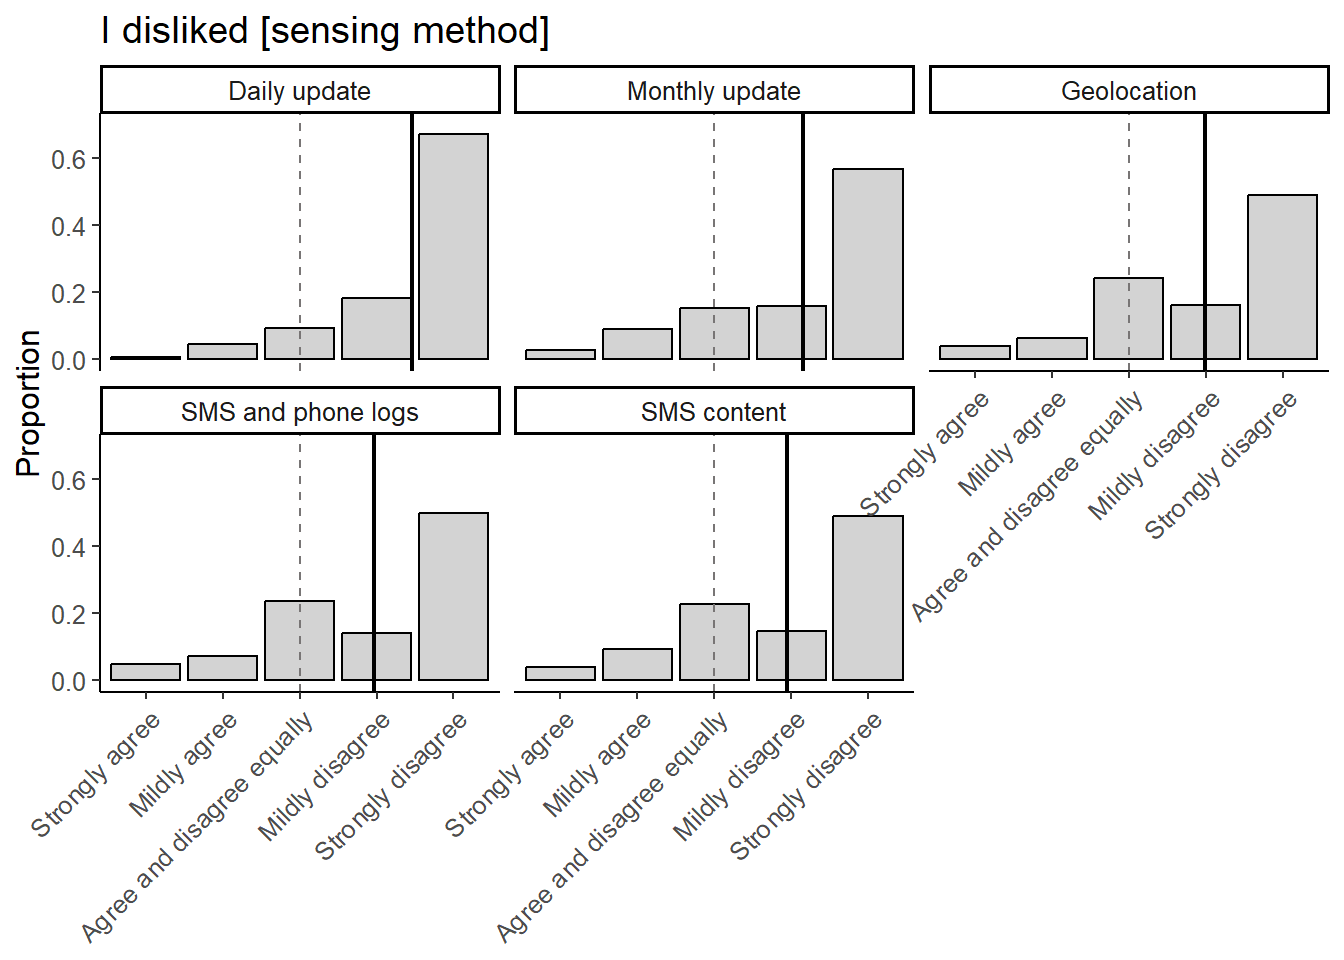

In [ ]:

plot_dis


Overall correlations

In [ ]:
burden_ana |> 
  select(contains("interfere")) |> 
  cor()


                         daily_update_interfere monthly_update_interfere
daily_update_interfere                1.0000000                0.5074471
monthly_update_interfere              0.5074471                1.0000000

ICC

In [ ]:
burden_ana |> 
  select(contains("interfere")) |> 
  psych::ICC()


Call: psych::ICC(x = select(burden_ana, contains("interfere")))

Intraclass correlation coefficients 
                         type  ICC   F df1 df2       p lower bound upper bound
Single_raters_absolute   ICC1 0.49 2.9 246 247 5.7e-17        0.39        0.58
Single_random_raters     ICC2 0.50 3.0 246 246 1.2e-17        0.40        0.59
Single_fixed_raters      ICC3 0.50 3.0 246 246 1.2e-17        0.40        0.59
Average_raters_absolute ICC1k 0.66 2.9 246 247 5.7e-17        0.56        0.74
Average_random_raters   ICC2k 0.66 3.0 246 246 1.2e-17        0.57        0.74
Average_fixed_raters    ICC3k 0.67 3.0 246 246 1.2e-17        0.58        0.74

 Number of subjects = 247     Number of Judges =  2
See the help file for a discussion of the other 4 McGraw and Wong estimates,

#### Correlation and Summary Statistics

Run one sample t-tests to compare each raw data stream mean (for self-reported acceptability about interference) to a neutral score of 0.

In [ ]:
(dis_daily <- broom::tidy(lm(daily_update_dislike ~ 1, data = burden_ana)) |> 
  mutate(sd = sd(burden_ana$daily_update_dislike, na.rm = TRUE),
         d = mean(burden_ana$daily_update_dislike, na.rm = TRUE)/sd))


# A tibble: 1 × 7
  term        estimate std.error statistic  p.value    sd     d
  <chr>          <dbl>     <dbl>     <dbl>    <dbl> <dbl> <dbl>
1 (Intercept)     1.47    0.0570      25.7 1.19e-71 0.896  1.64

# A tibble: 1 × 7
  term        estimate std.error statistic  p.value    sd     d
  <chr>          <dbl>     <dbl>     <dbl>    <dbl> <dbl> <dbl>
1 (Intercept)     1.15    0.0733      15.7 6.37e-39  1.15  1.00

# A tibble: 1 × 7
  term        estimate std.error statistic  p.value    sd     d
  <chr>          <dbl>     <dbl>     <dbl>    <dbl> <dbl> <dbl>
1 (Intercept)    0.996    0.0743      13.4 3.71e-31  1.17 0.853

# A tibble: 1 × 7
  term        estimate std.error statistic  p.value    sd     d
  <chr>          <dbl>     <dbl>     <dbl>    <dbl> <dbl> <dbl>
1 (Intercept)    0.972    0.0774      12.6 2.98e-28  1.21 0.801

# A tibble: 1 × 7
  term        estimate std.error statistic  p.value    sd     d
  <chr>          <dbl>     <dbl>     <dbl>    <dbl> <dbl> <dbl>
1 (Intercept)    0.951    0.0773      12.3 2.26e-27  1.21 0.786

Overall correlations

In [ ]:
burden_ana |> 
  select(contains("dislike")) |> 
  cor(use = "pairwise.complete.obs")


                       daily_update_dislike monthly_update_dislike gps_dislike
daily_update_dislike              1.0000000              0.4799559   0.3206389
monthly_update_dislike            0.4799559              1.0000000   0.3255222
gps_dislike                       0.3206389              0.3255222   1.0000000
sms_phone_logs_dislike            0.3308976              0.3289403   0.7574698
sms_content_dislike               0.3106661              0.2966956   0.7177839
                       sms_phone_logs_dislike sms_content_dislike
daily_update_dislike                0.3308976           0.3106661
monthly_update_dislike              0.3289403           0.2966956
gps_dislike                         0.7574698           0.7177839
sms_phone_logs_dislike              1.0000000           0.8275681
sms_content_dislike                 0.8275681           1.0000000

ICC

In [ ]:
burden_ana |> 
  select(contains("dislike")) |> 
  psych::ICC()


Call: psych::ICC(x = select(burden_ana, contains("dislike")))

Intraclass correlation coefficients 
                         type  ICC   F df1 df2     p lower bound upper bound
Single_raters_absolute   ICC1 0.46 5.2 246 988 8e-78        0.40        0.52
Single_random_raters     ICC2 0.46 5.6 246 984 5e-84        0.40        0.53
Single_fixed_raters      ICC3 0.48 5.6 246 984 5e-84        0.42        0.54
Average_raters_absolute ICC1k 0.81 5.2 246 988 8e-78        0.77        0.84
Average_random_raters   ICC2k 0.81 5.6 246 984 5e-84        0.77        0.85
Average_fixed_raters    ICC3k 0.82 5.6 246 984 5e-84        0.78        0.85

 Number of subjects = 247     Number of Judges =  5
See the help file for a discussion of the other 4 McGraw and Wong estimates,